In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset obtained from scraping
df=pd.read_csv('practo_dataset.csv')
df.head()

,Unnamed: 0,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee
0,0,Dr. Harish K C,Gastroenterologist,"MBBS, MD - General Medicine, DM - Gastroentero...",12 Years Experience Overall (4 years as speci...,"Ashoknagar, Bangalore",Bangalore,93%,(27 votes),₹ 800 fee
1,1,Dr. Deepa Raje Nimbalkar,Homoeopath,"BHMS, MD - Homeopathy, MD - Pediatrics",18 Years Experience Overall,"HSR Layout, Bangalore",Bangalore,96%,(117 votes),₹ 600 fee
2,2,Dr. Rupal V Rana,General Physician,MBBS,21 Years Experience Overall,"Borivali West, Mumbai",Mumbai,97%,(34 votes),₹ 2130 fee
3,3,Dr. Khushboo Nikhil Kedia,Dentist,"BDS, Comprehensive Course in Modern Endodontics",14 Years Experience Overall,"Mulund West, Mumbai",Mumbai,92%,(13 votes),₹ 300 fee
4,4,Dr. Shashi Kumar B,Dentist,BDS,7 Years Experience Overall,"Hebbal, Bangalore",Bangalore,100%,(22 votes),₹ 200 fee


### Specification of the dataset:

The dataset contains the name of the doctors registered in Practo along with their specialities, educational background, number of years of experience,
 location, their dp which reflects the rating given by customers based on their experience, their npv which reflects the number of voting received by the
  doctors and finally the consulting fees charged by them.

### Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7327 entries, 0 to 7326
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            7327 non-null   int64 
 1   name                  7327 non-null   object
 2   speciality_of_doctor  7327 non-null   object
 3   degree_type           7327 non-null   object
 4   year_of_experiance    7322 non-null   object
 5   Location              7327 non-null   object
 6   city                  7327 non-null   object
 7   dp_score              4372 non-null   object
 8   npv                   6137 non-null   object
 9   consult_fee           7327 non-null   object
dtypes: int64(1), object(9)
memory usage: 572.5+ KB


In [5]:
#checking for duplicated data in the raw data
df[df.duplicated()]

,Unnamed: 0,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee


In [6]:
#dropping the unnamed column
df.drop(df.iloc[:,0:1], axis=1, inplace=True)
df.head()

,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee
0,Dr. Harish K C,Gastroenterologist,"MBBS, MD - General Medicine, DM - Gastroentero...",12 Years Experience Overall (4 years as speci...,"Ashoknagar, Bangalore",Bangalore,93%,(27 votes),₹ 800 fee
1,Dr. Deepa Raje Nimbalkar,Homoeopath,"BHMS, MD - Homeopathy, MD - Pediatrics",18 Years Experience Overall,"HSR Layout, Bangalore",Bangalore,96%,(117 votes),₹ 600 fee
2,Dr. Rupal V Rana,General Physician,MBBS,21 Years Experience Overall,"Borivali West, Mumbai",Mumbai,97%,(34 votes),₹ 2130 fee
3,Dr. Khushboo Nikhil Kedia,Dentist,"BDS, Comprehensive Course in Modern Endodontics",14 Years Experience Overall,"Mulund West, Mumbai",Mumbai,92%,(13 votes),₹ 300 fee
4,Dr. Shashi Kumar B,Dentist,BDS,7 Years Experience Overall,"Hebbal, Bangalore",Bangalore,100%,(22 votes),₹ 200 fee


In [7]:
#rechecking the duplication of data obtained from Scraping
df[df.duplicated()]

,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee


In [8]:
#for a better understanding of all the values in each column, we check for unique values
for i in df.columns[1:]:
    print(i)
    print(df[i].unique())

speciality_of_doctor
['Gastroenterologist' 'Homoeopath' 'General Physician' 'Dentist'
 'Ophthalmologist' 'Pediatrician' 'Psychologist' 'Orthopedist'
 'Psychiatrist' 'Neurologist' 'General Surgeon'
 'Gynecologist/obstetrician' 'Nephrologist' 'Spine Surgeon'
 'Dermatologist' 'Ayurveda' 'Internal Medicine' 'Dietitian/nutritionist'
 'Pulmonologist' 'Radiologist' 'Physiotherapist' 'Plastic Surgeon'
 'Occupational Therapist' 'Yoga And Naturopathy' 'Sexologist'
 'Cardiologist' 'General Practitioner' 'Bariatric Surgeon' 'Audiologist'
 'Urologist' 'Oncologist' 'Gastrointestinal Surgeon' 'Rheumatologist'
 'Ear-nose-throat (ent) Specialist' 'Vascular Surgeon' 'Endocrinologist'
 'Unani' 'Hair Transplant Surgeon' 'Cosmetologist' 'Veterinarian'
 'Neurosurgeon' 'Pediatric Neurologist' 'Pediatric Surgeon'
 'Laparoscopic Surgeon' 'Pediatric Hematologic-oncologist' 'Geriatrician'
 'Acupuncturist' 'Spine And Pain Specialist' 'Family Physician'
 'Pediatric Cardiologist' 'Cardiothoracic Surgeon' 'Hypnother

In [9]:
#checking for the count of the unique values
for i in df.columns[1:]:
    print(i, ': ', df[i].nunique())


speciality_of_doctor :  84
degree_type :  1511
year_of_experiance :  670
Location :  479
city :  28
dp_score :  67
npv :  770
consult_fee :  89


In [10]:
#checking for the frequency of the unique values
for i in df.columns[1:]:
    print(i)
    print(df[i].value_counts())

speciality_of_doctor
Dentist                                     1413
Gynecologist/obstetrician                    849
Pediatrician                                 406
General Physician                            393
Orthopedist                                  384
                                            ... 
Sports Medicine Specialist                     1
Pharmacist                                     1
Chiropractor                                   1
Urogynecologist                                1
Patient Stories for Dr. Shailendra Patil       1
Name: speciality_of_doctor, Length: 84, dtype: int64
degree_type
BDS                                                                           594
MBBS                                                                          201
MBBS, MS - General Surgery                                                    178
MBBS, MS - Orthopaedics                                                       173
MBBS, MD - Pediatrics                          

In [11]:
#considering the data only for cities Bangalore, Delhi, Mumbai
df=df[df['city'].isin(['Bangalore', 'Delhi', 'Mumbai'])]
df.head()

,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee
0,Dr. Harish K C,Gastroenterologist,"MBBS, MD - General Medicine, DM - Gastroentero...",12 Years Experience Overall (4 years as speci...,"Ashoknagar, Bangalore",Bangalore,93%,(27 votes),₹ 800 fee
1,Dr. Deepa Raje Nimbalkar,Homoeopath,"BHMS, MD - Homeopathy, MD - Pediatrics",18 Years Experience Overall,"HSR Layout, Bangalore",Bangalore,96%,(117 votes),₹ 600 fee
2,Dr. Rupal V Rana,General Physician,MBBS,21 Years Experience Overall,"Borivali West, Mumbai",Mumbai,97%,(34 votes),₹ 2130 fee
3,Dr. Khushboo Nikhil Kedia,Dentist,"BDS, Comprehensive Course in Modern Endodontics",14 Years Experience Overall,"Mulund West, Mumbai",Mumbai,92%,(13 votes),₹ 300 fee
4,Dr. Shashi Kumar B,Dentist,BDS,7 Years Experience Overall,"Hebbal, Bangalore",Bangalore,100%,(22 votes),₹ 200 fee


In [12]:
#extracting only the year of experience
for m in range(len(df['year_of_experiance'])):
    try:
        arr = [i for i in df['year_of_experiance'].iloc[m].split() if i.isdigit()]
        df['year_of_experiance'].iloc[m] = arr[0]
    except:
        pass

In [13]:
#removing '%' from dp_score
df['dp_score'] = df['dp_score'].str.replace('%', '')

In [14]:
#extracting the number for npv
df['npv'] = df['npv'].str.replace('(', '').str.replace(')', '')

for i in range(len(df['npv'])):
    try:
        n,k = map(str, df['npv'].iloc[i].split())
        df['npv'].iloc[i]= n
    except:
        pass

C:\Users\Sai Rishik\AppData\Local\Temp\ipykernel_20084\180451944.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['npv'] = df['npv'].str.replace('(', '').str.replace(')', '')


In [15]:
#extract the number from consulting fees
df['consult_fee'] = df['consult_fee'].str.replace('₹ ', '')

for i in range(len(df['consult_fee'])):
    try:
        n,k = map(str, df['consult_fee'].iloc[i].split())
        df['consult_fee'].iloc[i]= n
    except:
        pass

In [16]:
df.head()

,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee
0,Dr. Harish K C,Gastroenterologist,"MBBS, MD - General Medicine, DM - Gastroentero...",12,"Ashoknagar, Bangalore",Bangalore,93,27,800
1,Dr. Deepa Raje Nimbalkar,Homoeopath,"BHMS, MD - Homeopathy, MD - Pediatrics",18,"HSR Layout, Bangalore",Bangalore,96,117,600
2,Dr. Rupal V Rana,General Physician,MBBS,21,"Borivali West, Mumbai",Mumbai,97,34,2130
3,Dr. Khushboo Nikhil Kedia,Dentist,"BDS, Comprehensive Course in Modern Endodontics",14,"Mulund West, Mumbai",Mumbai,92,13,300
4,Dr. Shashi Kumar B,Dentist,BDS,7,"Hebbal, Bangalore",Bangalore,100,22,200


In [17]:
#shape of data
df.shape

(7129, 9)

In [18]:
#info of the dataset for the type of data and number of non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7129 entries, 0 to 7326
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  7129 non-null   object
 1   speciality_of_doctor  7129 non-null   object
 2   degree_type           7129 non-null   object
 3   year_of_experiance    7124 non-null   object
 4   Location              7129 non-null   object
 5   city                  7129 non-null   object
 6   dp_score              4251 non-null   object
 7   npv                   5964 non-null   object
 8   consult_fee           7129 non-null   object
dtypes: object(9)
memory usage: 557.0+ KB


In [19]:
# converting the numric data into numeric datatype
lst=['year_of_experiance', 'dp_score', 'npv', 'consult_fee']
for i in lst:
    df[i]=pd.to_numeric(df[i], errors='coerce')

In [20]:
df.isnull().sum()

name                       0
speciality_of_doctor       0
degree_type                0
year_of_experiance         5
Location                   0
city                       0
dp_score                2878
npv                     2878
consult_fee                0
dtype: int64

In [21]:
#percentage of null values
((df.isnull().sum())*100)/(len(df))

name                     0.000000
speciality_of_doctor     0.000000
degree_type              0.000000
year_of_experiance       0.070136
Location                 0.000000
city                     0.000000
dp_score                40.370318
npv                     40.370318
consult_fee              0.000000
dtype: float64

In [22]:
#dropping nulls from the experience column
df.dropna(subset=['year_of_experiance'], inplace=True)

In [23]:
#replace nulls with 0
df.fillna(0, inplace=True)

In [2]:
#rechecking nulls
df.isnull().sum()

NameError: name 'df' is not defined

### Exploratory Data Analysis

In [25]:
df.describe()

,year_of_experiance,dp_score,npv,consult_fee
count,7124.000000,7124.000000,7124.000000,7124.000000
mean,19.185991,56.280882,113.736946,867.888546
std,10.431627,46.754593,316.628405,522.458525
min,1.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,500.000000
50%,17.000000,90.000000,20.000000,750.000000
75%,25.000000,98.000000,91.000000,1000.000000
max,66.000000,100.000000,8031.000000,5000.000000


### Univariate Analysis

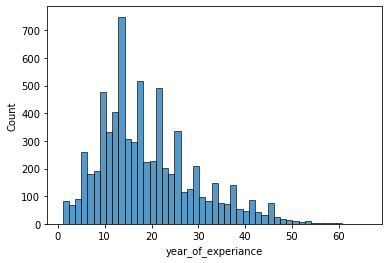

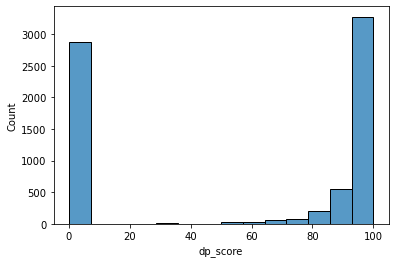

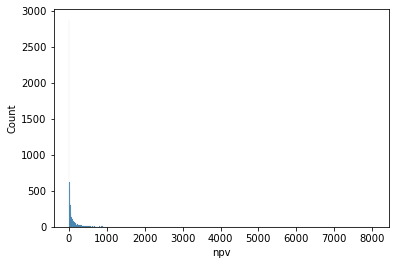

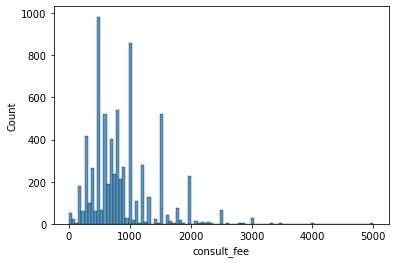

In [26]:
#checking for distograms
lst =['year_of_experiance', 'dp_score', 'npv', 'consult_fee']
for i in lst:
    plt.show()
    sns.histplot(df[i])

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


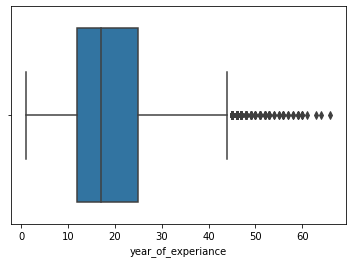

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


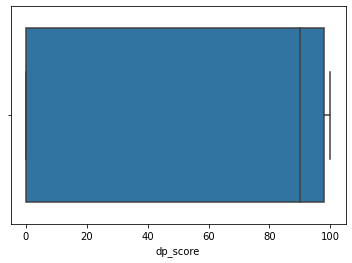

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


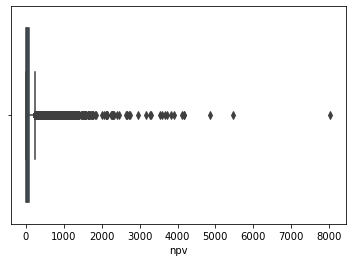

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


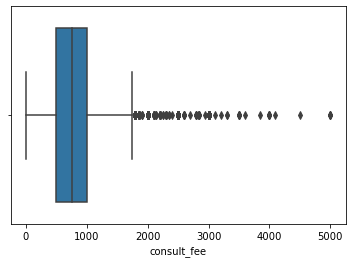

In [27]:
#boxplots for the numerical data types
lst =['year_of_experiance', 'dp_score', 'npv', 'consult_fee']
for i in lst:
    plt.show()
    sns.boxplot(df[i])

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


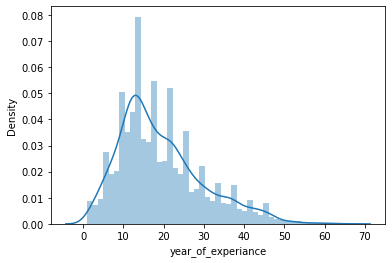

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


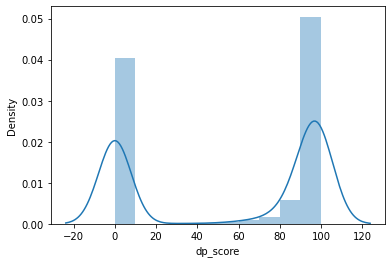

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


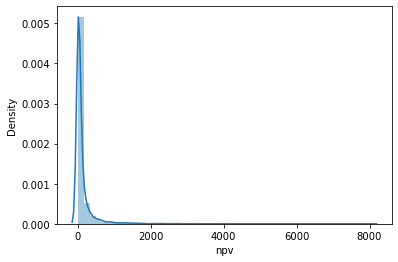

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


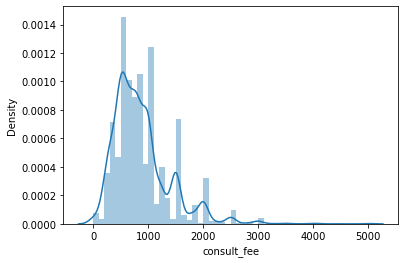

In [28]:
#checking for distribution plot
lst =['year_of_experiance', 'dp_score', 'npv', 'consult_fee']
for i in lst:
    plt.show()
    sns.distplot(df[i])

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


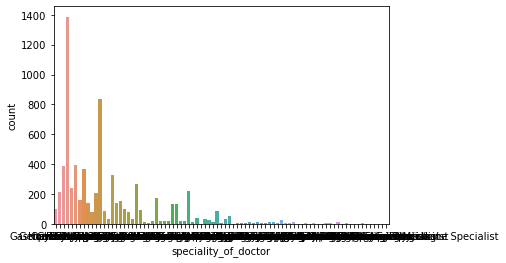

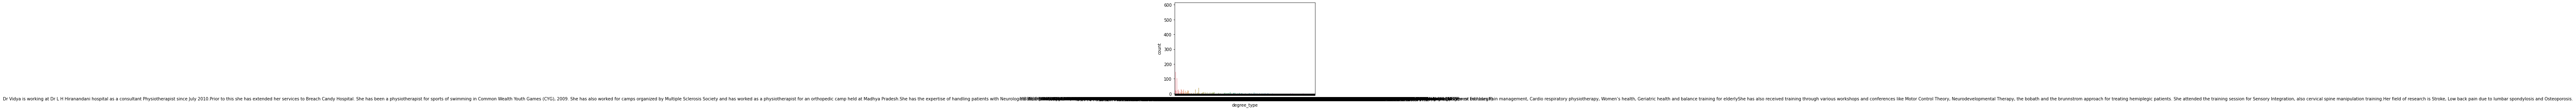

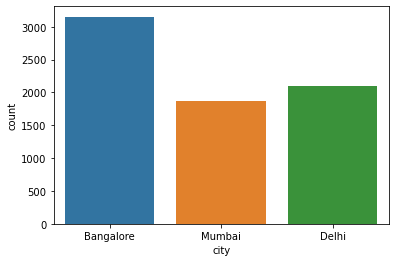

In [29]:
lst = ['speciality_of_doctor', 'degree_type', 'city']
for i in lst:
    plt.figure()
    sns.countplot(df[i])

In [30]:
#### Bivariate Analysis

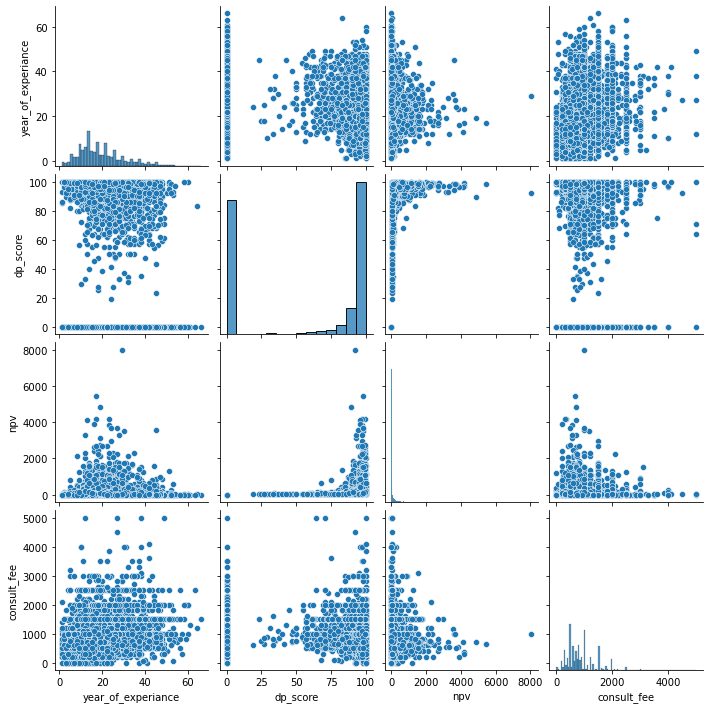

In [31]:
sns.pairplot(df)

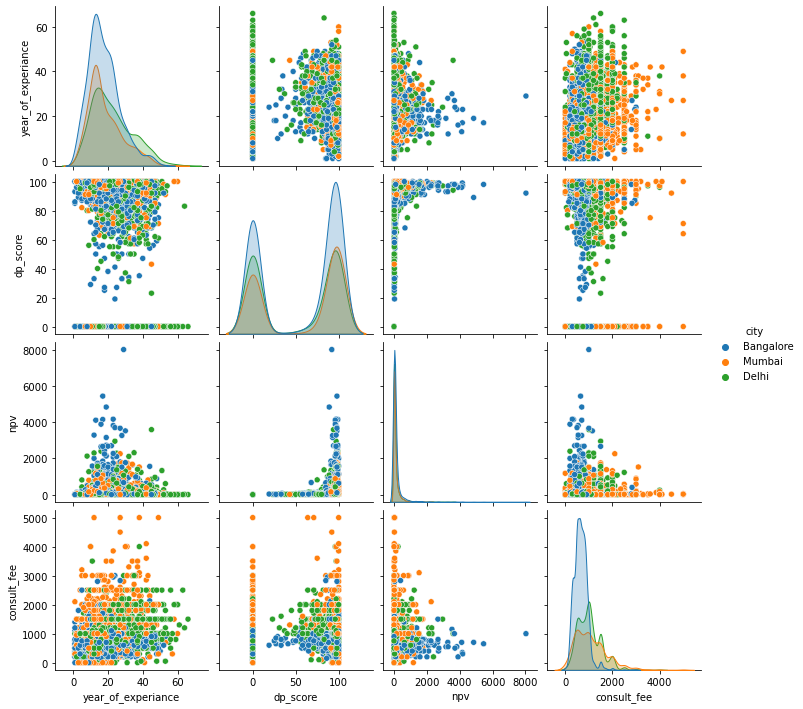

In [32]:
sns.pairplot(df, hue='city')

<AxesSubplot:xlabel='consult_fee', ylabel='city'>

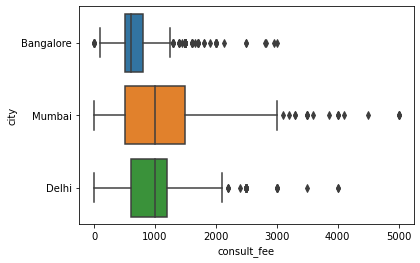

In [33]:
sns.boxplot(x=df['consult_fee'], y=df['city'])

<AxesSubplot:>

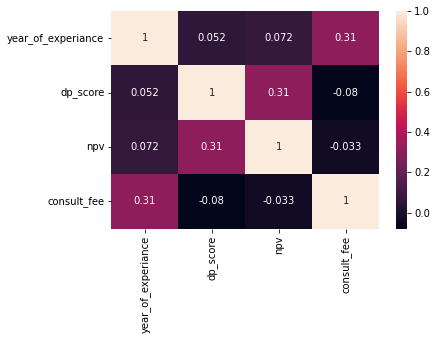

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
### Feature Engineering

In [36]:
df.columns

Index(['name', 'speciality_of_doctor', 'degree_type', 'year_of_experiance',
       'Location', 'city', 'dp_score', 'npv', 'consult_fee'],
      dtype='object')

In [37]:
for i in df['degree_type'].values:
    print(i)

MBBS, MD - General Medicine, DM - Gastroenterology
BHMS, MD - Homeopathy, MD - Pediatrics
MBBS
BDS, Comprehensive Course in Modern Endodontics
BDS
MBBS, MS - Ophthalmology
MBBS, Diploma in Child Health (DCH), DNB - Paediatrics
MBBS, MD - General Medicine, DNB - Gastroenterology
BHMS, MD - Homeopathy, MS - Counselling and Psychotherapy
MBBS, MS - Orthopaedics
BDS
DNB - General Medicine, MBBS, DM - Gastroenterology
MBBS, MD - General Medicine
BDS
MBBS, M.D. (Psychiatry), Diploma in Psychiatry, MRCPsych, Diploma in Clinical Psychiatry, Diploma in Clinical Psychiatry
MBBS, MD - General Medicine, DM - Neurology
MBBS, MS - General Surgery
M.D. (Psychiatry), MBBS
MBBS, MD - General Medicine
BDS, MDS - Prosthodontist And Crown Bridge
MBBS, DNB - Orthopedics/Orthopedic Surgery, M.Ch - Orthopaedics, Diploma in Orthopaedics
MBBS, MS - Orthopaedics
MBBS, MS - General Surgery
MBBS, MD - Medicine
BHMS
MBBS, DGO, Fellowship in Reproductive Medicine
MBBS, MD - Obstetrics & Gynaecology
MBBS, M.D. (Psyc

In [38]:
#### Adjusting the categories in qualification column

In [39]:
df['Count_Qualifications'] = df['degree_type'].apply(lambda x: len(x.split(',')))

In [40]:
Qual_split = df['degree_type'].str.split(",", n = 1, expand = True)

In [41]:
Qual_split_0 = Qual_split[0].str.split("-", n = 1, expand = True)
Qual_split_0[0]=Qual_split[0].str.strip()
Qual_split_0[0].value_counts()

MBBS                                  4049
BDS                                   1231
BPTh/BPT                               215
BHMS                                   185
BAMS                                   139
                                      ... 
CCT - Trauma & Orthopaedic Surgery       1
MPTh/MPT - Sports Physiotherapy          1
BSc. - Home Science                      1
DM - Hepatology                          1
BSc. - Home Science (Dietetics)          1
Name: 0, Length: 259, dtype: int64

In [42]:
df['Qualification']=Qual_split_0[0]

In [43]:
df.head()

,name,speciality_of_doctor,degree_type,year_of_experiance,Location,city,dp_score,npv,consult_fee,Count_Qualifications,Qualification
0,Dr. Harish K C,Gastroenterologist,"MBBS, MD - General Medicine, DM - Gastroentero...",12.0,"Ashoknagar, Bangalore",Bangalore,93.0,27.0,800,3,MBBS
1,Dr. Deepa Raje Nimbalkar,Homoeopath,"BHMS, MD - Homeopathy, MD - Pediatrics",18.0,"HSR Layout, Bangalore",Bangalore,96.0,117.0,600,3,BHMS
2,Dr. Rupal V Rana,General Physician,MBBS,21.0,"Borivali West, Mumbai",Mumbai,97.0,34.0,2130,1,MBBS
3,Dr. Khushboo Nikhil Kedia,Dentist,"BDS, Comprehensive Course in Modern Endodontics",14.0,"Mulund West, Mumbai",Mumbai,92.0,13.0,300,2,BDS
4,Dr. Shashi Kumar B,Dentist,BDS,7.0,"Hebbal, Bangalore",Bangalore,100.0,22.0,200,1,BDS


In [44]:
df.drop('degree_type', axis=1, inplace=True)

In [45]:
df.head()

,name,speciality_of_doctor,year_of_experiance,Location,city,dp_score,npv,consult_fee,Count_Qualifications,Qualification
0,Dr. Harish K C,Gastroenterologist,12.0,"Ashoknagar, Bangalore",Bangalore,93.0,27.0,800,3,MBBS
1,Dr. Deepa Raje Nimbalkar,Homoeopath,18.0,"HSR Layout, Bangalore",Bangalore,96.0,117.0,600,3,BHMS
2,Dr. Rupal V Rana,General Physician,21.0,"Borivali West, Mumbai",Mumbai,97.0,34.0,2130,1,MBBS
3,Dr. Khushboo Nikhil Kedia,Dentist,14.0,"Mulund West, Mumbai",Mumbai,92.0,13.0,300,2,BDS
4,Dr. Shashi Kumar B,Dentist,7.0,"Hebbal, Bangalore",Bangalore,100.0,22.0,200,1,BDS


In [46]:
count=df['Qualification'].value_counts()
trans = count[count<=40].index
df['Qualification']=df['Qualification'].replace(trans, 'Others')

In [47]:
df['Qualification'].value_counts()

MBBS                     4049
BDS                      1231
Others                   1163
BPTh/BPT                  215
BHMS                      185
BAMS                      139
MA - Psychology            52
MD - General Medicine      48
MS - Orthopaedics          42
Name: Qualification, dtype: int64

In [48]:
df['Qualification']=df['Qualification'].str.split(" ", n = 1, expand = True)[0]

In [49]:
df.shape

(7124, 10)

In [50]:
df['Qualification'].value_counts()

MBBS        4049
BDS         1231
Others      1163
BPTh/BPT     215
BHMS         185
BAMS         139
MA            52
MD            48
MS            42
Name: Qualification, dtype: int64

In [51]:
df.columns

Index(['name', 'speciality_of_doctor', 'year_of_experiance', 'Location',
       'city', 'dp_score', 'npv', 'consult_fee', 'Count_Qualifications',
       'Qualification'],
      dtype='object')

In [52]:
df.head()

,name,speciality_of_doctor,year_of_experiance,Location,city,dp_score,npv,consult_fee,Count_Qualifications,Qualification
0,Dr. Harish K C,Gastroenterologist,12.0,"Ashoknagar, Bangalore",Bangalore,93.0,27.0,800,3,MBBS
1,Dr. Deepa Raje Nimbalkar,Homoeopath,18.0,"HSR Layout, Bangalore",Bangalore,96.0,117.0,600,3,BHMS
2,Dr. Rupal V Rana,General Physician,21.0,"Borivali West, Mumbai",Mumbai,97.0,34.0,2130,1,MBBS
3,Dr. Khushboo Nikhil Kedia,Dentist,14.0,"Mulund West, Mumbai",Mumbai,92.0,13.0,300,2,BDS
4,Dr. Shashi Kumar B,Dentist,7.0,"Hebbal, Bangalore",Bangalore,100.0,22.0,200,1,BDS


In [53]:
df.drop(['Location', 'name'], axis=1, inplace=True)

In [54]:
#### Adjusting the skewness in the data

In [55]:
df1= df.select_dtypes(include='number')
df1.columns

Index(['year_of_experiance', 'dp_score', 'npv', 'consult_fee',
       'Count_Qualifications'],
      dtype='object')

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

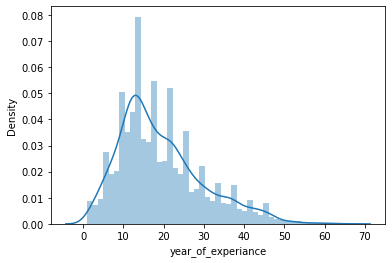

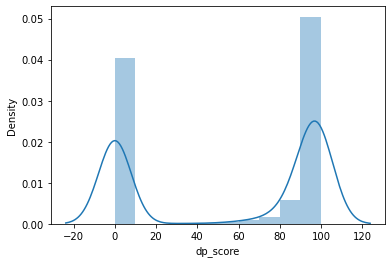

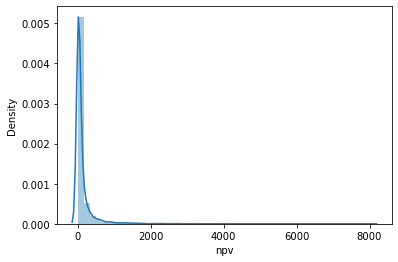

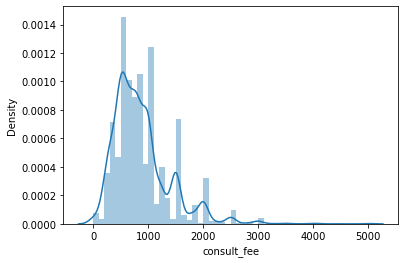

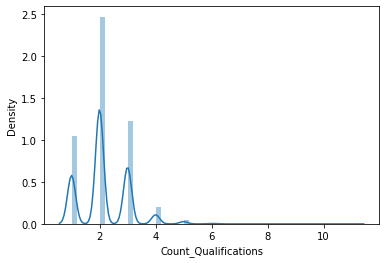

In [56]:
for i in df1.columns:
    plt.figure()
    sns.distplot(df[i])

In [57]:
# df['year_of_experiance'] = np.log(df['year_of_experiance'])
# sns.distplot(df['year_of_experiance'])

In [58]:
df.head()

,speciality_of_doctor,year_of_experiance,city,dp_score,npv,consult_fee,Count_Qualifications,Qualification
0,Gastroenterologist,12.0,Bangalore,93.0,27.0,800,3,MBBS
1,Homoeopath,18.0,Bangalore,96.0,117.0,600,3,BHMS
2,General Physician,21.0,Mumbai,97.0,34.0,2130,1,MBBS
3,Dentist,14.0,Mumbai,92.0,13.0,300,2,BDS
4,Dentist,7.0,Bangalore,100.0,22.0,200,1,BDS


In [59]:
#### Encoding

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

In [61]:
df_ohe = pd.DataFrame(ohe.fit_transform(df[['Qualification', 'city']]))
ohe.categories_

[array(['BAMS', 'BDS', 'BHMS', 'BPTh/BPT', 'MA', 'MBBS', 'MD', 'MS',
        'Others'], dtype=object),
 array(['Bangalore', 'Delhi', 'Mumbai'], dtype=object)]

In [62]:
df_ohe.columns=ohe.get_feature_names_out()
df_ohe

,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_ohe

,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df= pd.concat([df, df_ohe], axis =1)
df.drop(['city','Qualification'], axis=1, inplace=True)

In [65]:
df.head()

,speciality_of_doctor,year_of_experiance,dp_score,npv,consult_fee,Count_Qualifications,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai
0,Gastroenterologist,12.0,93.0,27.0,800.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Homoeopath,18.0,96.0,117.0,600.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,General Physician,21.0,97.0,34.0,2130.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Dentist,14.0,92.0,13.0,300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Dentist,7.0,100.0,22.0,200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#### Target Encoding

In [67]:
import category_encoders as ce
tgt_enc=ce.TargetEncoder()

C:\Users\Sai Rishik\AppData\Roaming\Python\Python39\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Sai Rishik\AppData\Roaming\Python\Python39\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [68]:
col=['speciality_of_doctor']
for i in col:
    tgt_enc.fit(X=df[i], y=df['consult_fee'])
    values = tgt_enc.transform(df[i])
    df = pd.concat([df, values], axis=1)

In [69]:
df=df.iloc[:,1:]
df.head()

,year_of_experiance,dp_score,npv,consult_fee,Count_Qualifications,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai,speciality_of_doctor
0,12.0,93.0,27.0,800.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1096.464646
1,18.0,96.0,117.0,600.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,691.028436
2,21.0,97.0,34.0,2130.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,800.909561
3,14.0,92.0,13.0,300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,453.098774
4,7.0,100.0,22.0,200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453.098774


In [70]:
df.columns

Index(['year_of_experiance', 'dp_score', 'npv', 'consult_fee',
       'Count_Qualifications', 'Qualification_BDS', 'Qualification_BHMS',
       'Qualification_BPTh/BPT', 'Qualification_MA', 'Qualification_MBBS',
       'Qualification_MD', 'Qualification_MS', 'Qualification_Others',
       'city_Delhi', 'city_Mumbai', 'speciality_of_doctor'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7322 entries, 0 to 7098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year_of_experiance      7124 non-null   float64
 1   dp_score                7124 non-null   float64
 2   npv                     7124 non-null   float64
 3   consult_fee             7124 non-null   float64
 4   Count_Qualifications    7124 non-null   float64
 5   Qualification_BDS       7124 non-null   float64
 6   Qualification_BHMS      7124 non-null   float64
 7   Qualification_BPTh/BPT  7124 non-null   float64
 8   Qualification_MA        7124 non-null   float64
 9   Qualification_MBBS      7124 non-null   float64
 10  Qualification_MD        7124 non-null   float64
 11  Qualification_MS        7124 non-null   float64
 12  Qualification_Others    7124 non-null   float64
 13  city_Delhi              7124 non-null   float64
 14  city_Mumbai             7124 non-null   

In [72]:
df.isnull().sum()

year_of_experiance        198
dp_score                  198
npv                       198
consult_fee               198
Count_Qualifications      198
Qualification_BDS         198
Qualification_BHMS        198
Qualification_BPTh/BPT    198
Qualification_MA          198
Qualification_MBBS        198
Qualification_MD          198
Qualification_MS          198
Qualification_Others      198
city_Delhi                198
city_Mumbai               198
speciality_of_doctor      198
dtype: int64

In [73]:
df.shape

(7322, 16)

In [74]:
df[df.isna().any(axis=1)]

,year_of_experiance,dp_score,npv,consult_fee,Count_Qualifications,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai,speciality_of_doctor
7124,15.0,0.0,0.0,1000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.424324
7125,8.0,0.0,0.0,1000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.098774
7126,24.0,0.0,0.0,750.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1127.303371
7127,39.0,0.0,0.0,1200.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.825581
7128,14.0,0.0,0.0,900.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.097561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
7064,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
7071,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
7091,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [75]:
df.dropna(inplace=True)

In [76]:
df

,year_of_experiance,dp_score,npv,consult_fee,Count_Qualifications,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,city_Delhi,city_Mumbai,speciality_of_doctor
0,12.0,93.0,27.0,800.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1096.464646
1,18.0,96.0,117.0,600.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,691.028436
2,21.0,97.0,34.0,2130.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,800.909561
3,14.0,92.0,13.0,300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,453.098774
4,7.0,100.0,22.0,200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453.098774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,19.0,0.0,0.0,800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,811.592593
7120,9.0,0.0,0.0,400.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,453.098774
7121,21.0,98.0,325.0,600.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,519.221429
7122,31.0,96.0,239.0,400.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,453.098774


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# x=df[['year_of_experiance', 'dp_score', 'npv', 'Count_Qualifications', 'Qualification_BDS', 'Qualification_BHMS',
#        'Qualification_BPTh/BPT', 'Qualification_MA', 'Qualification_MBBS', 'Qualification_MD', 'Qualification_MS', 'Qualification_Others',
#        'city_Delhi', 'city_Mumbai', 'speciality_of_doctor']]
# y=df['consult_fee']

In [79]:
x=df[['city_Delhi', 'city_Mumbai','speciality_of_doctor','Qualification_BDS', 'Qualification_BHMS',
       'Qualification_BPTh/BPT', 'Qualification_MA', 'Qualification_MBBS', 'Qualification_MD', 'Qualification_MS', 'Qualification_Others','year_of_experiance', 'dp_score', 'npv'
      ]]
y=df['consult_fee']

In [80]:
x

,city_Delhi,city_Mumbai,speciality_of_doctor,Qualification_BDS,Qualification_BHMS,Qualification_BPTh/BPT,Qualification_MA,Qualification_MBBS,Qualification_MD,Qualification_MS,Qualification_Others,year_of_experiance,dp_score,npv
0,0.0,0.0,1096.464646,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,93.0,27.0
1,0.0,0.0,691.028436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,96.0,117.0
2,0.0,1.0,800.909561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,97.0,34.0
3,0.0,1.0,453.098774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,92.0,13.0
4,0.0,0.0,453.098774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,100.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,0.0,1.0,811.592593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0
7120,0.0,0.0,453.098774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0
7121,1.0,0.0,519.221429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,98.0,325.0
7122,0.0,0.0,453.098774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,31.0,96.0,239.0


In [81]:
X_train, X_dev, Y_train, Y_dev = train_test_split(x,y,test_size=0.01, random_state=5)

In [82]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()

In [83]:
scaler=mmsc.fit(X_train.values)

In [84]:
X_train = scaler.transform(X_train)
X_dev = scaler.transform(X_dev)

d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [85]:
### Modelling

In [86]:
#### Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
model=LinearRegression()

In [89]:
model.fit(X_train, Y_train)
Y_pred_reg=model.predict(X_dev)
Y_pred_reg

array([ 988.56704825,  574.72246343,  644.84660958,  908.42271869,
       1292.33423868,  574.79643848, 1361.83819427,  834.8002917 ,
        868.42858477,  657.65196978,  672.04544192,  410.50574306,
        905.3671936 ,  461.29324628, 1033.53596899, 1285.58212478,
        781.33496252,  943.20551519,  463.42667877,  982.46500561,
        486.26276782,  416.70507405,  417.04577905,  903.26249262,
       1156.92151635, 1223.88278972, 1832.82971757,  954.22367505,
       1223.77654187, 1284.00218923, 1205.44689112, 1113.83734265,
        391.75109738,  381.86986381, 1040.99752665,  555.76474044,
        690.57477955,  438.55443431, 1123.84190728,  595.02999884,
        556.50852751,  539.01712838,  577.62782519,  907.46445615,
        801.95518069,  793.62471392,  407.62122746, 1072.88196422,
        737.41639651, 1062.97850331,  342.86230393, 1680.02842844,
       1043.12419681,  347.06294999,  965.43473012, 1358.28975054,
       1329.39346089,  650.83235445, 1098.5905374 ,  824.41848

In [90]:
model.coef_

array([  -2.26212845,    2.63313282, 1790.21701296,   14.15548318,
         27.91691929,   42.00254514,   29.2736319 ,   19.43601274,
        -13.83813198,  -11.46448441,  -10.11100167,  788.53734011,
        -24.10418029,   45.603365  ])

In [91]:
model.intercept_

259.8870781269336

In [92]:
metrics.mean_squared_error(Y_dev,Y_pred_reg)

115671.01533621756

In [93]:
np.sqrt(metrics.mean_squared_error(Y_dev,Y_pred_reg))

340.10441828388167

In [94]:
metrics.r2_score(Y_dev, Y_pred_reg)

0.4299644754657098

In [95]:
# Determine the training accuracy
model.fit(X_train, Y_train)
Y_pred_reg_train=model.predict(X_train)
metrics.r2_score(Y_train, Y_pred_reg_train)

0.34808236659150793

In [96]:
model.fit(X_dev, Y_dev)
Y_pred_reg_test=model.predict(X_dev)
metrics.r2_score(Y_dev, Y_pred_reg_test)

0.6031345275754791

In [97]:
with open('model.pkl','wb') as files:
    pkl.dump(model,files)

In [101]:
with open('scaler.pkl','wb') as files:
    pkl.dump(scaler,files)

### Regression Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 5)

In [103]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=5)

In [104]:
Y_pred_dt=dt.predict(X_dev)

In [105]:

x.columns

Index(['city_Delhi', 'city_Mumbai', 'speciality_of_doctor',
       'Qualification_BDS', 'Qualification_BHMS', 'Qualification_BPTh/BPT',
       'Qualification_MA', 'Qualification_MBBS', 'Qualification_MD',
       'Qualification_MS', 'Qualification_Others', 'year_of_experiance',
       'dp_score', 'npv'],
      dtype='object')

In [106]:

 # from sklearn.tree import plot_tree
# plt.figure(figsize=(10,10))
# plot_tree(dt, feature_names=x.columns)

In [107]:
metrics.mean_squared_error(Y_dev,Y_pred_dt)

277134.83015873015

In [108]:
np.sqrt(metrics.mean_squared_error(Y_dev,Y_pred_dt))

526.4359696665209

In [109]:
metrics.r2_score(Y_dev, Y_pred_dt)

-0.36574143329741626

In [110]:
#### Random Forest Regression

In [111]:
n_est=[100, 200, 300, 400, 500]
max_feat=['sqrt', 'log2']
max_dep=[int(x) for x in np.linspace(1,50,15)]
min_sample_split=[10,20,30,40]
min_sample_leaf=[10,20,30,40]
crit=['entropy', 'gini']

In [112]:
random_grid={
    'n_estimators': n_est,
    'max_features': max_feat,
    'max_depth': max_dep,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf,
    'criterion': crit
}

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

In [114]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=rfc, param_distributions= random_grid, n_iter=20, cv=5, n_jobs=-1)

In [115]:
rscv.fit(X_train, Y_train)

d:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 4, 8, 11, 15, 18, 22,
                                                      25, 29, 32, 36, 39, 43,
                                                      46, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 20, 30, 40],
                                        'min_samples_split': [10, 20, 30, 40],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [116]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 20,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [117]:
randomfc = RandomForestClassifier(n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features='sqrt', max_depth=18, criterion='gini')

In [118]:
randomfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=10, n_estimators=500)

In [119]:
Y_pred_rf = randomfc.predict(X_dev)
Y_pred_rf

array([1500.,  500.,  500., 1000., 1500.,  500., 1000.,  600., 1000.,
        500.,  450.,  500., 1000.,  500., 1000., 1500., 1000., 1000.,
        500., 1000.,  500.,  500.,  500., 1000., 1000., 1500., 2000.,
       1000., 1000., 1000., 1500., 1000.,  500.,  500., 1000.,  500.,
        500.,  500., 1500.,  500.,  500.,  500.,  500., 1000.,  500.,
       1000.,  500., 1000.,  800., 1500.,  500., 1500., 1000.,  500.,
       1000., 1000., 1000.,  500., 1000., 1000., 1500., 1000.,  500.,
       1000.,  500., 1000., 1000.,  500., 1000.,  500.])

In [120]:
metrics.mean_squared_error(Y_dev,Y_pred_rf)

162185.7142857143

In [121]:
np.sqrt(metrics.mean_squared_error(Y_dev,Y_pred_rf))

402.72287529480406

In [122]:
metrics.r2_score(Y_dev, Y_pred_rf)

0.20073651600533415

In [123]:
#### KNN

In [1]:
from sklearn.neighbors import KNeighborsRegressor

ModuleNotFoundError: No module named 'sklearn'

In [125]:
from sklearn.cluster import KMeans

In [126]:
inertia=[]
for k in range(1,15):
    kmeans = KMeans(k)
    kmeans.fit(X_train)
    kmeans.predict(X_train)
    a=kmeans.inertia_
    inertia.append(a)
    #inertia.append(kmeans.inertia_)

inertia

[8690.420492299661,
 6431.997768320599,
 5424.036110612745,
 4440.0527441336735,
 3844.179673020568,
 3370.951993920829,
 3039.030993177926,
 2717.141858384407,
 2421.0334763913984,
 2195.355813263966,
 1991.6321336146066,
 1827.0699433731947,
 1653.8345179037697,
 1544.466923320228]

In [127]:
rod=[]
for i in range(len(inertia)-1):
    b=((inertia[i]-inertia[i+1])/inertia[i])*100
    rod.append(b)

rod

[25.9874965311539,
 15.671051110626145,
 18.14116547922304,
 13.420405239563662,
 12.310238317448357,
 9.846506308647788,
 10.59183455239851,
 10.897788832014555,
 9.321542445741384,
 9.279756767376641,
 8.262680013238612,
 9.481597904762875,
 6.612970850443049]

Text(0.5, 1.0, 'Elbow Curve')

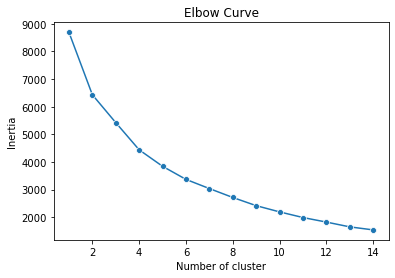

In [128]:
clusters=range(1,15)
sns.lineplot(x=clusters, y=inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

In [129]:
knn = KNeighborsRegressor(4)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [130]:
Y_pred_knn=knn.predict(X_dev)
Y_pred_knn

array([1150.  ,  475.  ,  800.  , 1400.  , 1250.  ,  512.5 , 1312.5 ,
        807.5 , 1012.5 ,  712.5 ,  787.5 ,  475.  ,  787.5 ,  287.5 ,
        887.5 , 1225.  ,  662.5 ,  662.5 ,  450.  ,  775.  ,  287.5 ,
        425.  ,  425.  ,  725.  , 1087.5 , 1775.  , 2875.  ,  747.5 ,
       1075.  , 1100.  ,  875.  , 1197.5 ,  525.  ,  737.5 , 1012.5 ,
        575.  ,  687.5 ,  362.5 , 1250.  ,  412.5 ,  725.  ,  387.5 ,
        700.  ,  762.5 ,  875.  , 1225.  ,  350.  , 1050.  ,  687.5 ,
       1000.  ,  250.  , 2412.5 , 1162.5 ,  575.  , 1025.  ,  887.5 ,
       1074.75,  637.5 , 1062.5 ,  837.5 , 1293.75,  862.5 ,  575.  ,
        800.  ,  450.  ,  875.  , 1162.5 ,  875.  ,  462.5 ,  550.  ])

In [131]:
metrics.mean_squared_error(Y_dev, Y_pred_knn)

161405.02321428573

In [132]:
np.sqrt(metrics.mean_squared_error(Y_dev,Y_pred_knn))

401.7524402094973

In [133]:
metrics.r2_score(Y_dev, Y_pred_knn)

0.20458382073511017

In [134]:
#### Polynomial Regression

In [135]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [136]:
poly_features = poly.fit_transform(x)

In [137]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(poly_features, y, test_size=0.1, random_state=5)

In [138]:
poly_reg_model = LinearRegression()

In [139]:
poly_reg_model.fit(X_train_poly, Y_train_poly)

LinearRegression()

In [140]:
poly_reg_y_pred = poly_reg_model.predict(X_test_poly)

In [141]:
metrics.mean_squared_error(Y_test_poly, poly_reg_y_pred)

213270.929380242

In [142]:
np.sqrt(metrics.mean_squared_error(Y_test_poly, poly_reg_y_pred))

461.8126561499176

In [143]:
metrics.r2_score(Y_test_poly, poly_reg_y_pred)

0.3283320366815674

In [144]:
#### Support Vector Regression

In [145]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, Y_train)

SVR()

In [146]:
Y_pred_svr_rbf = svr_rbf.predict(X_dev)
Y_pred_svr_rbf

array([798.25805806, 738.00529651, 706.78645337, 794.89843403,
       814.34461659, 744.62268497, 805.89960621, 741.52618317,
       783.89496525, 755.05165476, 760.990025  , 730.32349411,
       756.59551859, 737.55967027, 742.22102087, 789.90623036,
       776.97446203, 796.16893431, 676.89844489, 748.65517657,
       686.94079009, 668.66106982, 668.70030018, 783.78016997,
       822.80634036, 831.72434911, 868.62511859, 736.5688959 ,
       764.69490008, 822.34393373, 830.19736188, 773.93653929,
       686.32364545, 731.63203484, 809.1918199 , 728.39079133,
       702.20258783, 672.13302598, 792.74233965, 736.67485257,
       726.19057602, 740.56411418, 761.97911623, 755.32544981,
       784.92935122, 777.70796559, 759.81512753, 774.42267453,
       745.67937362, 770.04368892, 681.47046527, 818.14545847,
       750.58649706, 709.45832161, 766.21388449, 784.59845757,
       837.70702166, 771.01559849, 751.8745105 , 740.000072  ,
       823.88339164, 749.1997794 , 729.58251351, 739.62

In [147]:
metrics.mean_squared_error(Y_dev, Y_pred_svr_rbf)

185724.42507370634

In [148]:
np.sqrt(metrics.mean_squared_error(Y_dev, Y_pred_svr_rbf))

430.95756760231785

In [149]:
metrics.r2_score(Y_dev, Y_pred_svr_rbf)

0.08473596641309111

In [150]:
svr_lin = SVR(kernel = 'linear')
svr_lin.fit(X_train, Y_train)

SVR(kernel='linear')

In [151]:
Y_pred_svr_lin = svr_lin.predict(X_dev)
Y_pred_svr_lin

array([ 836.70395133,  656.38751026,  665.01167347,  793.47504602,
        871.92132996,  698.35951926,  848.04824888,  703.01124994,
        787.19232744,  717.84475427,  728.4560678 ,  655.67215733,
        746.65968464,  677.09282838,  744.1425197 ,  837.54307662,
        762.72036655,  798.9962381 ,  612.45592954,  746.60451753,
        617.94215403,  595.63922432,  595.61749693,  783.91808393,
        854.1471526 ,  872.49484161, 1022.94465468,  729.20264053,
        794.66330102,  880.25949803,  868.5596293 ,  780.40682502,
        592.24877299,  598.13287206,  827.44201715,  646.89406697,
        661.03286789,  602.999365  ,  856.56906839,  658.11021977,
        653.68315133,  689.53581521,  703.99796315,  727.48611976,
        764.99996682,  775.96400712,  670.2461914 ,  797.02972625,
        683.33325767,  782.67562433,  577.85947218,  939.03317824,
        751.58074573,  582.74622534,  759.75310045,  855.00027317,
        908.95766978,  726.33073651,  760.16509619,  697.77042

In [152]:
metrics.mean_squared_error(Y_dev, Y_pred_svr_lin)

163653.40085714275

In [153]:
np.sqrt(metrics.mean_squared_error(Y_dev, Y_pred_svr_lin))

404.54097549833284

In [154]:
metrics.r2_score(Y_dev, Y_pred_svr_lin)

0.19350364541831333